In [1]:
import pandas as pd
import scipy.stats as stats
df_pop = pd.read_csv('../../datasets/population.csv')
df_pop.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

In [3]:
# 'workclass', 'occupation', 'native_country'의 결측치를 최빈값으로 대체(최빈값은 극단적인 값의 영향을 받지 않기 때문에, 평균으로 대체하는 것보다 안정적)
for column in ['workclass', 'occupation', 'native_country']:
    most_frequent = df_pop[column].mode()[0]
    df_pop[column].fillna(most_frequent, inplace=True)

/tmp/ipykernel_71412/785881041.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pop[column].fillna(most_frequent, inplace=True)


In [4]:
# 결측치 처리 후 다시 확인
print("\n결측치 처리 후 비율:")
print(df_pop.isnull().mean() * 100)


결측치 처리 후 비율:
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education_num     0.0
marital_status    0.0
occupation        0.0
relationship      0.0
race              0.0
gender            0.0
capital_gain      0.0
capital_loss      0.0
hours_per_week    0.0
native_country    0.0
income            0.0
dtype: float64


나이와 자본 이익/손실 간의 관계
가설 1: 나이가 많을수록 자본 이익(capital_gain)이 높을 것이다.
가설 2: 나이가 많을수록 자본 손실(capital_loss)이 낮을 것이다.

In [7]:
correlation = df_pop[['age', 'capital_gain']].corr().iloc[0, 1]
correlation

0.0776744981659941

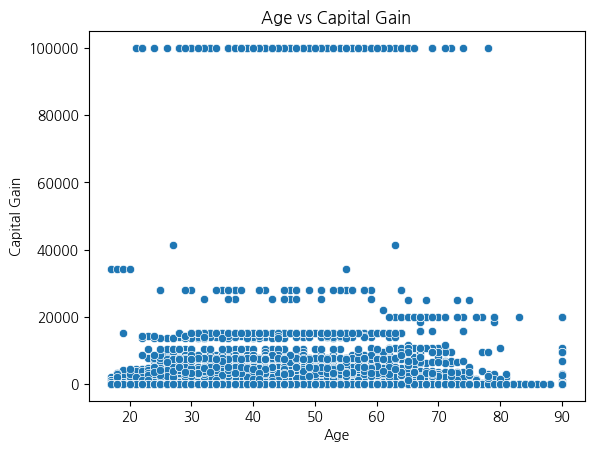

In [9]:
sns.scatterplot(x='age', y='capital_gain', data=df_pop)
plt.title('Age vs Capital Gain')
plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.show()

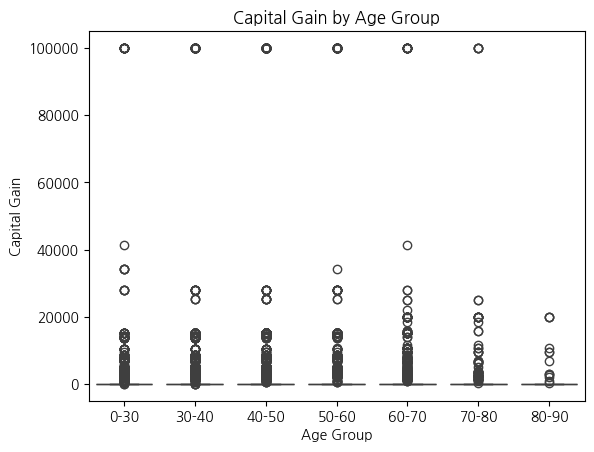

In [10]:
df_pop['age_group'] = pd.cut(df_pop['age'], bins=[0, 30, 40, 50, 60, 70, 80, 90], labels=['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])
sns.boxplot(x='age_group', y='capital_gain', data=df_pop)
plt.title('Capital Gain by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Capital Gain')
plt.show()

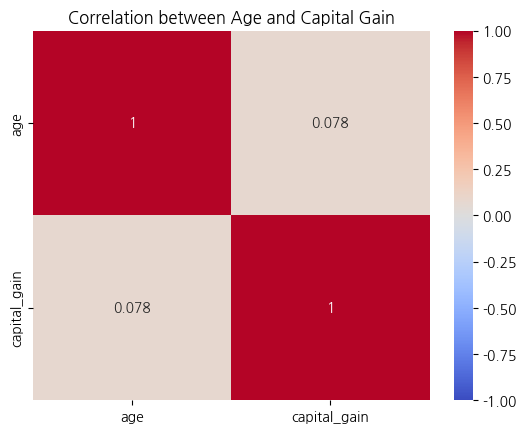

In [13]:
correlation_matrix = df_pop[['age', 'capital_gain']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Age and Capital Gain')
plt.show()

/tmp/ipykernel_71412/4103814587.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_capital_gain = df_pop.groupby('age_group')['capital_gain'].mean().reset_index()


TypeError: Invalid object type at position 0

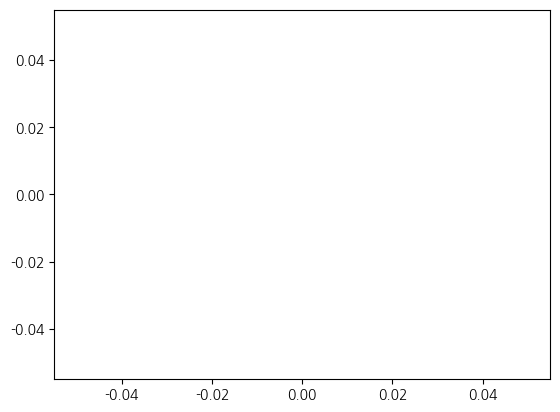

In [14]:
df_pop['age_group'] = pd.cut(df_pop['age'], bins=range(0, 100, 10), right=False)

# 그룹화된 나이 그룹별 자본 이익의 평균 계산
age_group_capital_gain = df_pop.groupby('age_group')['capital_gain'].mean().reset_index()

# 산점도 시각화
sns.scatterplot(x='age_group', y='capital_gain', data=age_group_capital_gain)
plt.xticks(rotation=45)  # X축 레이블 회전
plt.title('Average Capital Gain by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Capital Gain')
plt.show()